<a href="https://colab.research.google.com/github/VanTam23/AI/blob/main/Bai3_robot_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from math import cos, sin, pi
from pandas import DataFrame
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

theta1 = []
theta2 = []
theta3 = []
px = []
py = []
beta = []
l1 = 40
l2 = 50
l3 = 20


for i in range (0,80*10, 5):
    for j in range (0,170*10, 5):
      for k in range(0, 180*10, 5):
        t1 = i/10
        t2 = j/10
        t3 = k/10
        red = t1+t2+t3
        theta1.append(t1)
        theta2.append(t2)
        theta3.append(t3)

        px.append(round(l1*cos(t1*pi/180) + l2*cos((t1+t2)*pi/180) + l3*cos((t1+t2+t3)*pi/180), 2))
        py.append(round(l1*sin(t1*pi/180) + l2*sin((t1+t2)*pi/180) + l3*sin((t1+t2+t3)*pi/180), 2))
        beta.append(red)
df = DataFrame(np.c_[theta1,theta2,theta3,px,py,beta],columns = ['theta1','theta2','theta3','px','py','beta'])
export_csv = df.to_csv (r'3tudo.csv', index = None, header=True)


              theta1        theta2        theta3        px        py      beta
theta1  1.000000e+00  1.727707e-13  1.431098e-13 -0.548734  0.059211  0.307461
theta2  1.727707e-13  1.000000e+00  1.321087e-17 -0.631252 -0.806319  0.653364
theta3  1.431098e-13  1.321087e-17  1.000000e+00  0.144222 -0.237099  0.691797
px     -5.487340e-01 -6.312524e-01  1.442218e-01  1.000000  0.322558 -0.481379
py      5.921085e-02 -8.063192e-01 -2.370986e-01  0.322558  1.000000 -0.672639
beta    3.074607e-01  6.533639e-01  6.917974e-01 -0.481379 -0.672639  1.000000


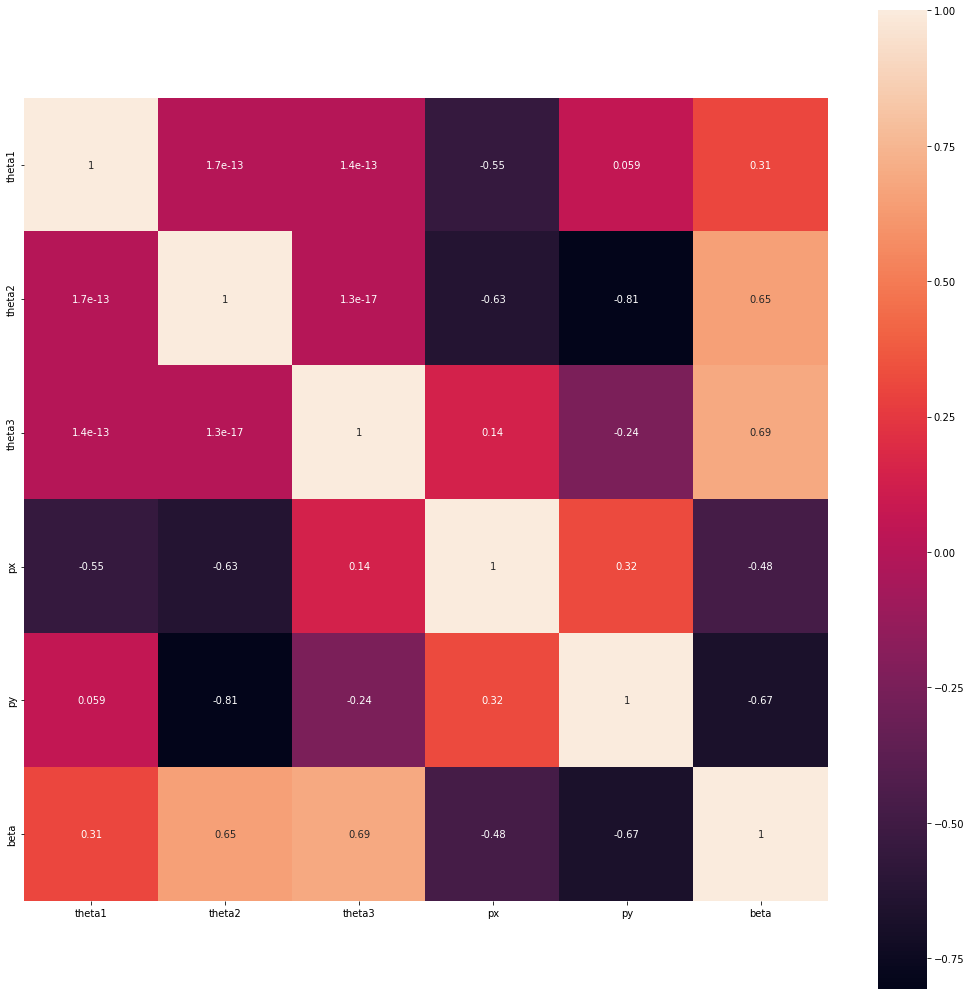

In [6]:


data = pd.read_csv('3tudo.csv')
corelations = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corelations, annot= True, square= True)
print(corelations)

In [7]:

x3 = data.drop(['theta1', 'theta2', 'theta3'], axis= 1)
y3 = data.drop(['px', 'py','beta'], axis= 1)
col_names= list(x3.columns)
s_scaler = StandardScaler()
x3_df = s_scaler.fit_transform(x3)
x3_df = pd.DataFrame(x3_df, columns= col_names)
x3_df.describe().T

,count,mean,std,min,25%,50%,75%,max
px,19584000.0,2.145784e-15,1.0,-1.978220,-0.733586,-0.186254,0.604042,3.120469
py,19584000.0,4.528842e-15,1.0,-2.377472,-0.767515,0.069517,0.759168,2.139132
beta,19584000.0,3.317911e-17,1.0,-2.852460,-0.708954,0.000000,0.708954,2.852460


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x3_df, y3, test_size = 0.25, random_state= 7)

model = Sequential()
model.add(Dense(512, activation= 'relu', kernel_initializer='random_normal', input_shape= (3,)))
model.add(Dense(512, activation= 'relu')
)
model.add(Dense(3))
model.summary()
opt= SGD(learning_rate = 0.01, momentum = 0.9)
model.compile(optimizer = RMSprop(), loss= 'mse', metrics= ['mean_absolute_error'])
history= model.fit(x_train, y_train, batch_size = 1024, epochs= 10, verbose= 1, validation_data= (x_test, y_test))
score= model.evaluate(x_test, y_test, verbose= 0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2048      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 266,243
Trainable params: 266,243
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
14344/14344 [==============================] - 683s 47ms/step - loss: 32.7052 - mean_absolute_error: 2.9828 - val_loss: 6.7193 - val_mean_absolute_error: 1.9999
Epoch 2/10
14344/14344 [==============================] - 669s 47ms/step - loss: 5.4186 - mean_absolute_error: 1.7103 - val_loss: 4.8756 - val

In [ ]:
import numpy as np
model.save('Robot.h5')
y_pred = model.predict(x_test)
print(y_pred)
cal = pd.DataFrame(np.c_[y_test,y_pred],columns = ['theta1', 'theta2', 'theta3','theta1 predict','theta2 predict', 'theta3 predict'])
print(cal)

pd.DataFrame(history.history).plot(figsize= (8,5))
plt.grid(True)
plt.gca().set_ylim(0,30)
plt.show()

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()